In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score
from xgboost import XGBRegressor
import numpy as np

In [8]:
# loading our data set
house_data = pd.read_csv(r"BostonHousing_price.csv")
house_data.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [9]:
#checking the number of rows and column
house_data.shape

(506, 14)

In [10]:
# checking some statistical data
house_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
#checking if there is any missing values
house_data.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


UNDERSTANDING THE CO-RELATION BETWEEN FEATURES IN THE DATASET

In [12]:
correlation = house_data.corr()

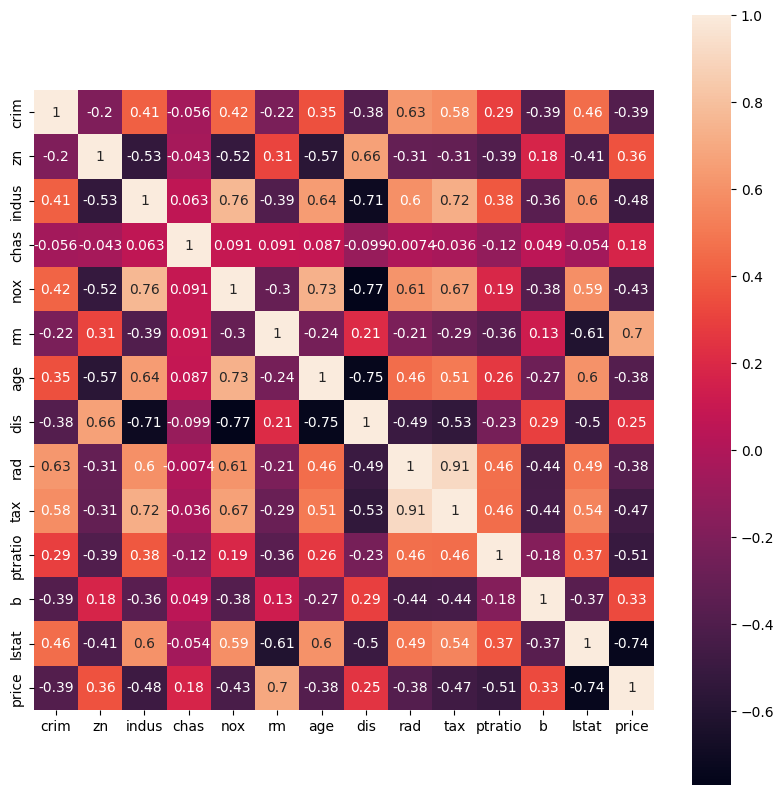

In [13]:
# heatmap are best for understanding the correlation
# majorly there are two types of corelation
# 1. POSITIVE       2. NEGATIVE
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation, cbar=True,square=True,annot=True)
plt.show()

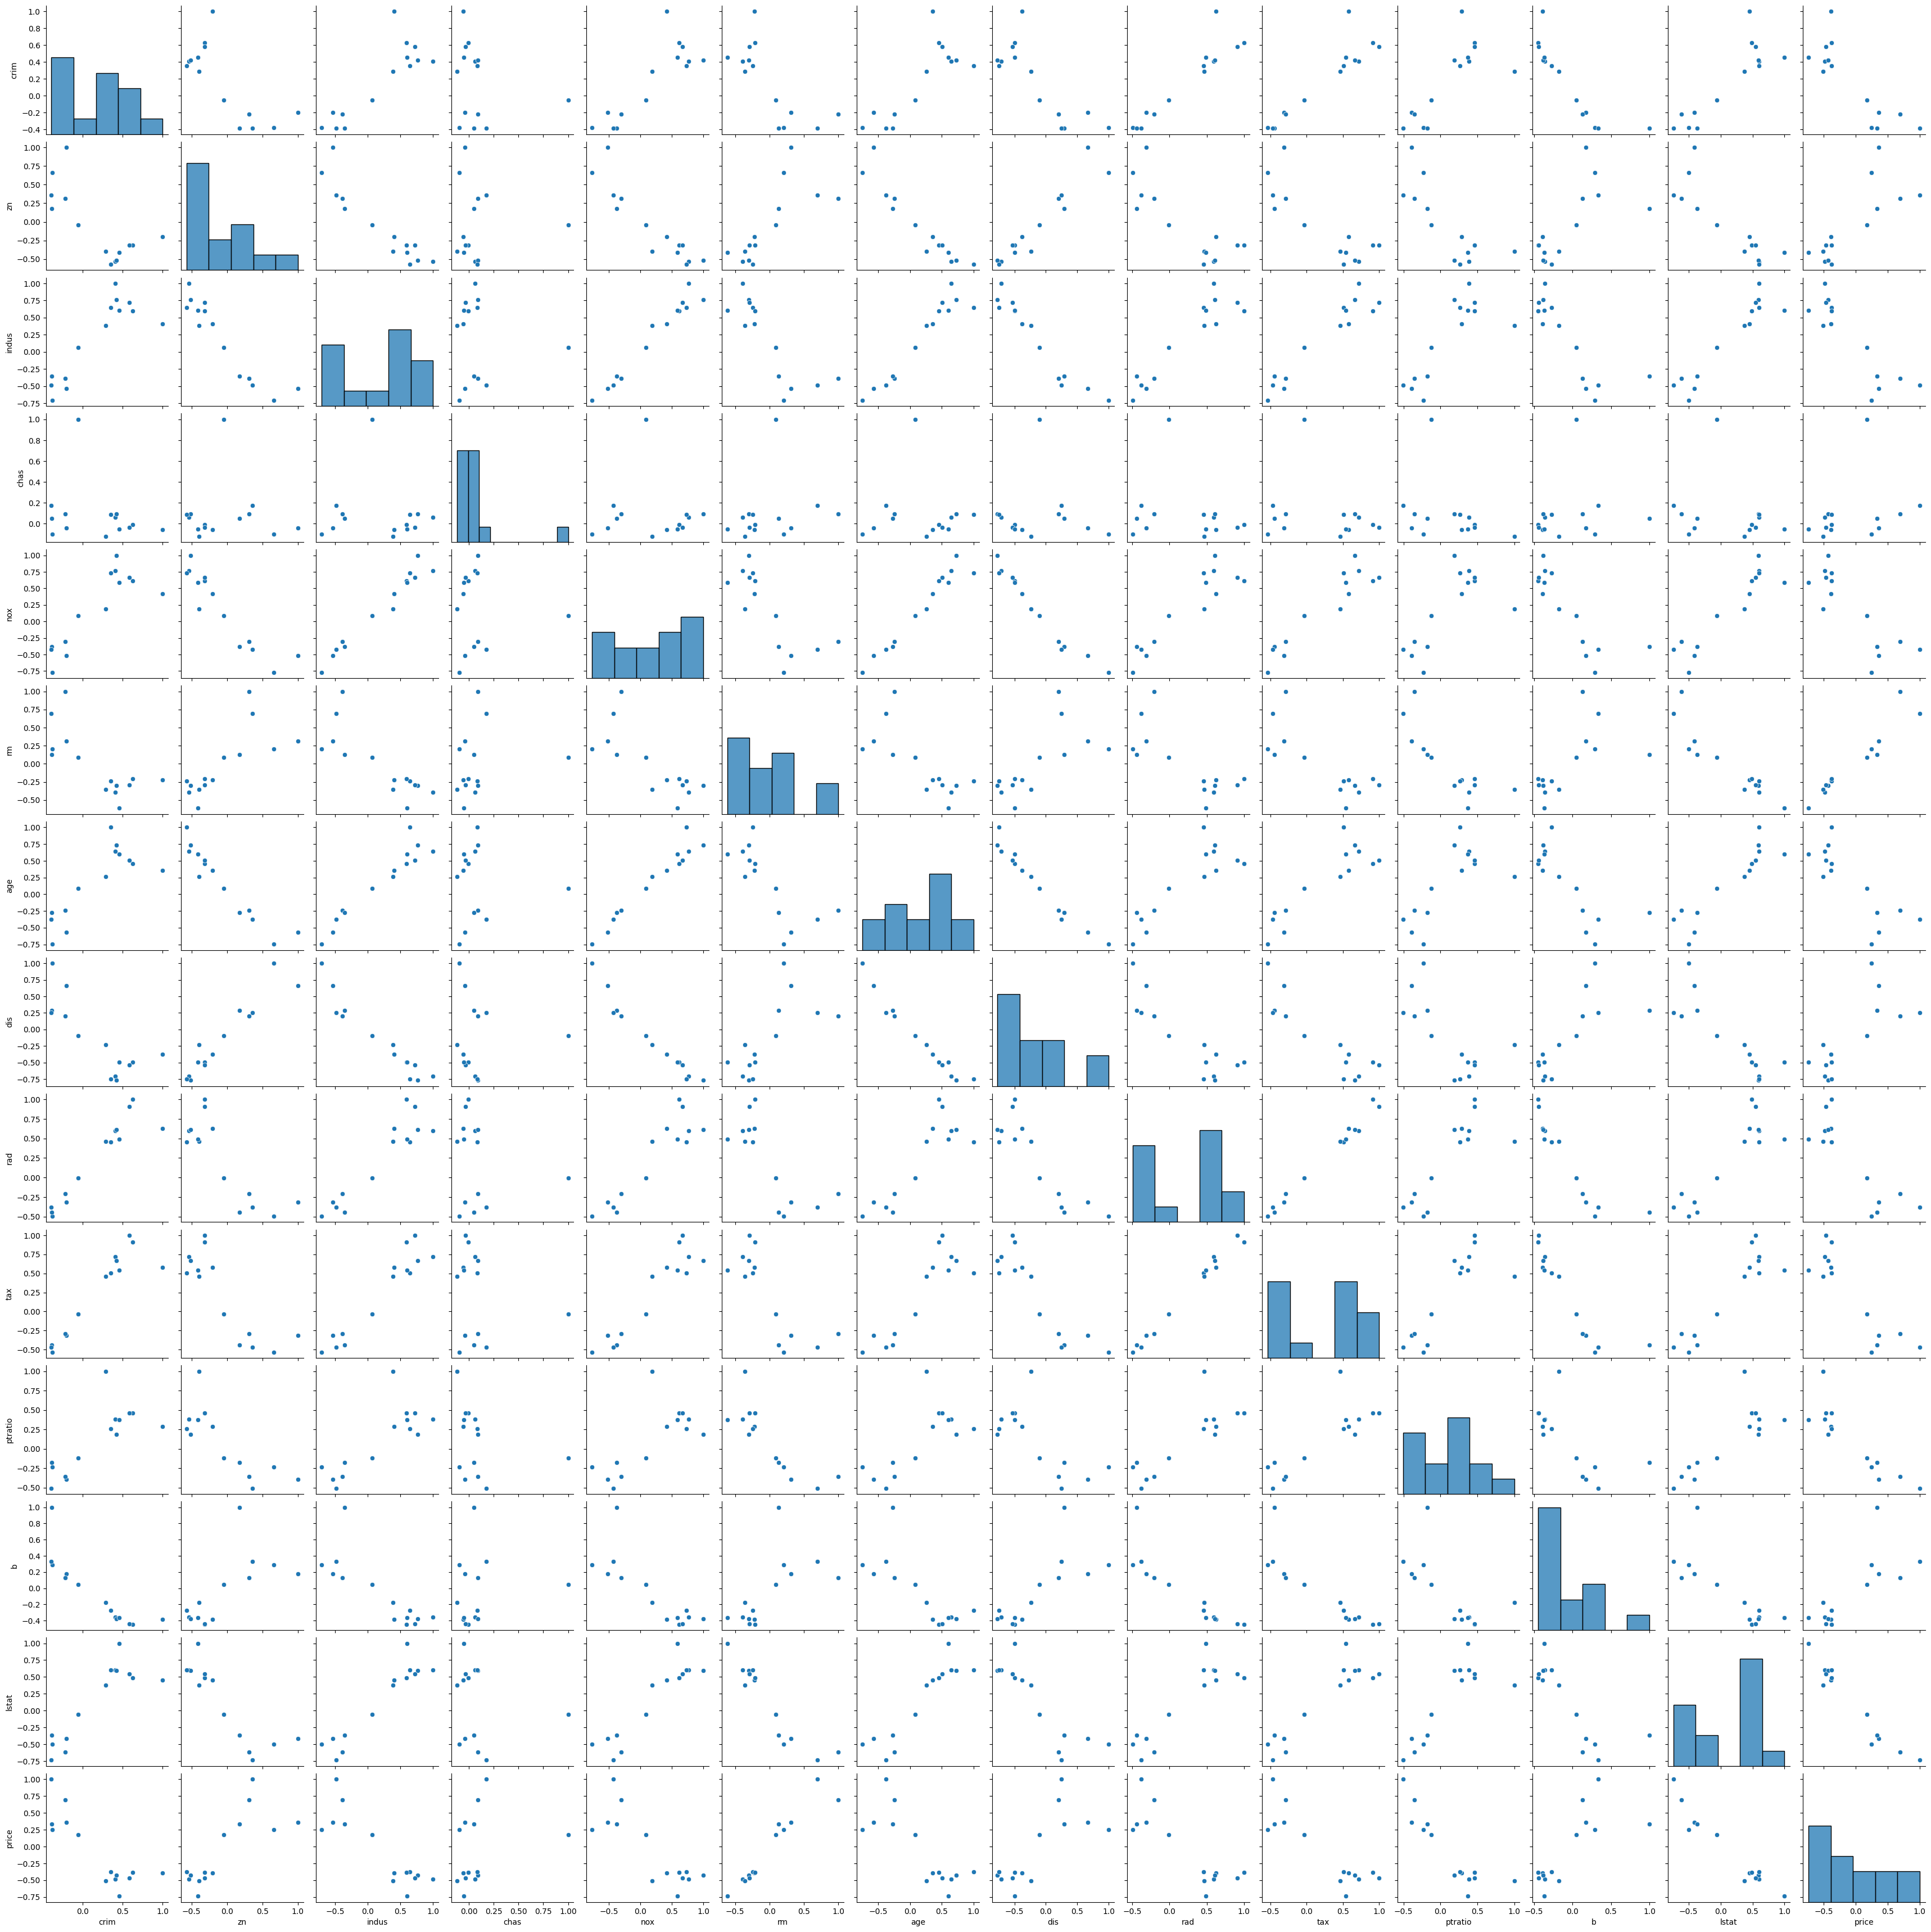

In [14]:
# just wanted to see the representaio through par plot
sns.pairplot(data=correlation)
plt.show()

SPLITTING THE DATA

In [15]:
x = house_data.iloc[:,:-1]
y = house_data["price"]

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Model Training though xgboost Regressor

In [17]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluating

In [18]:
#prediction on training data
training_data_prediction = xgb.predict(x_train)
#accuracy_training_data = accuracy_score(training_data_prediction,y_train)
#print(" the accuracy score of training data is : ", accuracy_training_data)

In [19]:
# R squarred error
score_1 = r2_score(y_train,training_data_prediction)

#mean absolute error
score_2 = mean_absolute_error(y_train, training_data_prediction)

print(" R squared error : ", score_1)
print(" Mean absolute error : ", score_2)

#as it is not much so we are good to go

 R squared error :  0.9999969829984965
 Mean absolute error :  0.011182523717974735


Visulaiizing the actual prices and Predicting prices

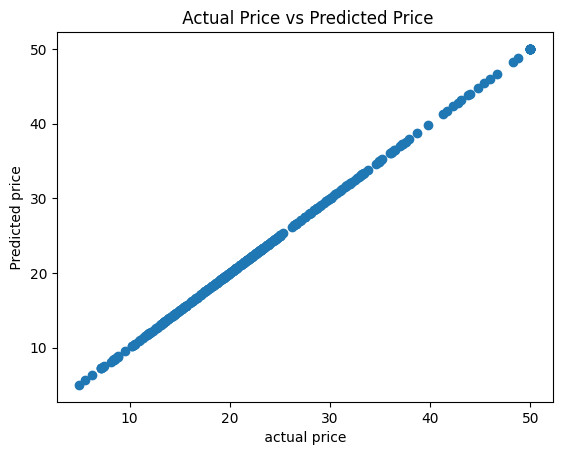

In [20]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel(" actual price ")
plt.ylabel(" Predicted price ")
plt.title(" Actual Price vs Predicted Price")
plt.show()

Prediction on Test Data

In [21]:
test_data_prediction = xgb.predict(x_test)

In [22]:
# R squarred error
score_1 = r2_score(y_test,test_data_prediction)

#mean absolute error
score_2 = mean_absolute_error(y_test, test_data_prediction)

print(" R squared error : ", score_1)
print(" Mean absolute error : ", score_2)

#as it is not much so we are good to go

 R squared error :  0.9057837838492537
 Mean absolute error :  1.8908873698290656


In [24]:
# Sample input from first row (excluding the 'price' column)
sample_input = np.array([[0.00632, 18.0, 2.31, 0, 0.538, 6.575,
                          65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]])

# Predict using trained XGBoost model
predicted_price = xgb.predict(sample_input)[0]

# Print the final price with verdict
print(f" Predicted House Price: ${predicted_price:.2f}K")

# Verdict
if predicted_price < 20:
    verdict = "🏠 Budget-friendly home. Great for entry-level buyers."
elif 20 <= predicted_price <= 35:
    verdict = "🏠 Well-priced property. Offers good value."
else:
    verdict = "💸 High-end property. Consider verifying its premium features."

print(verdict)


 Predicted House Price: $25.87K
🏠 Well-priced property. Offers good value.
